# **Edge Detection**
It is detecting changes in intensity for the
purpose of finding edges which can be accomplished using first- or second-order derivatives.

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
import random
import numpy as np
import matplotlib.pyplot as plt  
from PIL import Image, ImageFilter

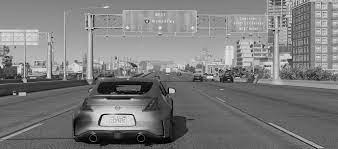

In [ ]:
# Reading the image
original_image = cv2.imread("/content/car2.jpg", 0)

# Displaying the image
cv2_imshow(original_image)

## Marr Hildreth edge detector



Laplacian of Gaussian

In [ ]:
def LOG(image):
  # Apply Gaussian Blur
  gaussian_blur = cv2.GaussianBlur(image,(3,3),0)
  
  # Apply Laplacian 
  laplacian = cv2.Laplacian(gaussian_blur,-1)
  return laplacian

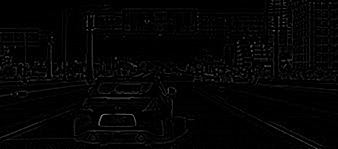

In [ ]:
# applying LoG filter on the original image
original_LOG = LOG(original_image)

# display image after applying LoG filter
cv2_imshow(original_LOG)

## Canny Edge Detetctor

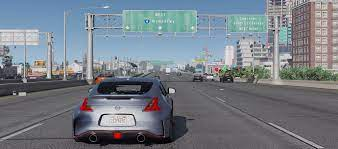

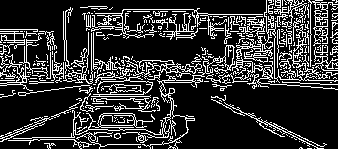

In [ ]:
import cv2

img = cv2.imread("/content/car2.jpg") # Read image

# Setting parameter values
t_lower = 50 # Lower Threshold
t_upper = 150 # Upper threshold

# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper)

cv2_imshow( img)
cv2_imshow(edge)
cv2.waitKey(0)
cv2.destroyAllWindows()


<Figure size 432x288 with 0 Axes>

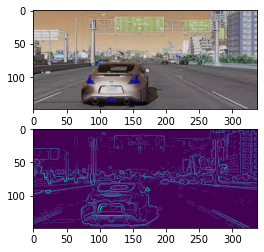

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


# defining the canny detector function

# here weak_th and strong_th are thresholds for
# double thresholding step
def Canny_detector(img, weak_th = None, strong_th = None):
	
	# conversion of image to grayscale
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	
	# Noise reduction step
	img = cv2.GaussianBlur(img, (5, 5), 1.4)
	
	# Calculating the gradients
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
	
	# Conversion of Cartesian coordinates to polar
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
	
	# setting the minimum and maximum thresholds
	# for double thresholding
	mag_max = np.max(mag)
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5
	
	# getting the dimensions of the input image
	height, width = img.shape
	
	# Looping through every pixel of the grayscale
	# image
	for i_x in range(width):
		for i_y in range(height):
			
			grad_ang = ang[i_y, i_x]
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
			
			# selecting the neighbours of the target pixel
			# according to the gradient direction
			# In the x axis direction
			if grad_ang<= 22.5:
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# top right (diagonal-1) direction
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# In y-axis direction
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# top left (diagonal-2) direction
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Now it restarts the cycle
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# Non-maximum suppression step
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img)
	strong_ids = np.zeros_like(img)			
	ids = np.zeros_like(img)
	
	# double thresholding step
	for i_x in range(width):
		for i_y in range(height):
			
			grad_mag = mag[i_y, i_x]
			
			if grad_mag<weak_th:
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th:
				ids[i_y, i_x]= 1
			else:
				ids[i_y, i_x]= 2
	
	
	# finally returning the magnitude of
	# gradients of edges
	return mag

frame = cv2.imread('/content/car2.jpg')

# calling the designed function for
# finding edges
canny_img = Canny_detector(frame)

# Displaying the input and output image
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(frame)
plots[1].imshow(canny_img)


## Edge Detection using Gradient Operators

In [ ]:
def plot_image(images):
        
    n=131
    plt.figure(figsize=(50,50))
    for img in images:
        plt.subplot(n)
        plt.imshow(img)
        plt.axis('off')
        n+=1
    plt.show()

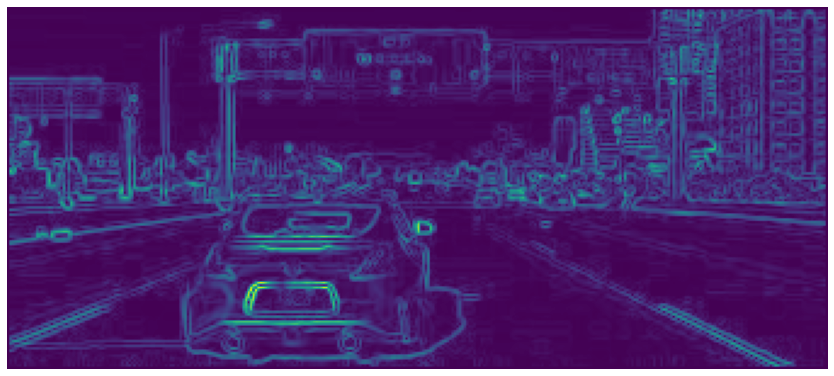

In [ ]:
from matplotlib.image import imread
grayscale_image = cv2.imread("/content/car2.jpg", 0)
 

# grayscale_image =gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  
sobel_filtered_image = np.zeros(shape=(rows, columns))  


for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  


plot_image([sobel_filtered_image])


# **Image Segmentation**
using Otsu's Threhold

Otsu's algorithm implementation thresholding result:  123.873046875


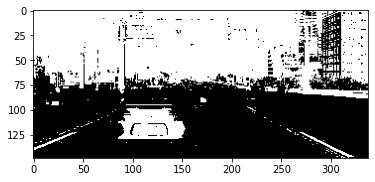

In [ ]:
image = cv2.imread('/content/car2.jpg', 0)
bins_num = 256
hist, bin_edges = np.histogram(image, bins=bins_num)
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
index_of_max_val = np.argmax(inter_class_variance)
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)


binary_mask = image > threshold

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
plt.show()


